Q1

a

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import gamma
from numpy import random
from scipy.stats import chi2
from scipy.stats import norm
import math

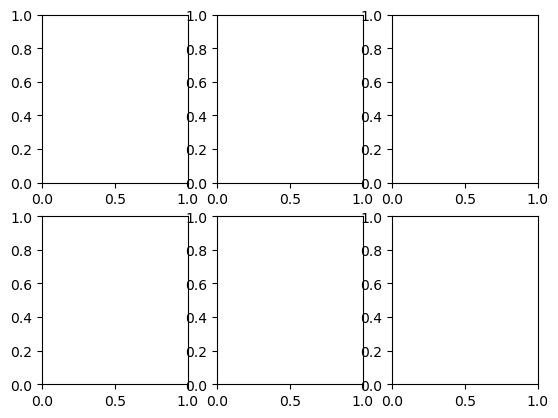

In [2]:
x, y = 0, 0
fig, axs = plt.subplots(2, 3)
percent = np.arange(0.5, 99.5, 0.5)
K=3
N=[5,10,50]
size=100000

b

In [3]:
for n in N:
    A = chi2.rvs(K, size=(100000, n))
print(A)

[[4.55422935 1.95196727 1.65191971 ... 2.49327531 3.690035   5.62851852]
 [1.64463764 2.52626466 4.08113297 ... 3.70515006 2.10209414 2.31186784]
 [1.33807531 4.85732421 5.12679875 ... 1.20043872 2.2611733  2.99639394]
 ...
 [0.86983253 9.48240668 2.98357739 ... 0.9220916  2.32277754 2.33025944]
 [1.34844287 1.83207239 1.77416612 ... 1.29739696 3.74344998 6.89193215]
 [5.84300379 0.81279985 5.54203806 ... 4.11382826 0.10161059 0.03939502]]


c,d,e

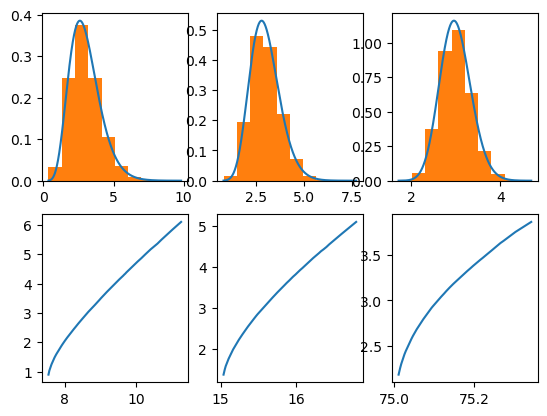

In [4]:
#c
fig,axs=plt.subplots(2, 3)
for n in N:
    A = chi2.rvs(K, size=(100000, n))
    sample_avg = np.mean(A,axis=1)
    sample_avg.sort()
#d
    gm = gamma.pdf(sample_avg, (n*K)/2, scale = 2/n)
    axs[0,x].plot(sample_avg, gm)
    axs[0,x].hist(sample_avg, density = True)
    x += 1
    
#e
    p1 = np.percentile(gamma.rvs(sample_avg, (n*K)/2, scale = 2/n), percent)
    p2 = np.percentile(sample_avg, percent)
    axs[1,y].plot(p1, p2)
    y += 1    

Q2

a

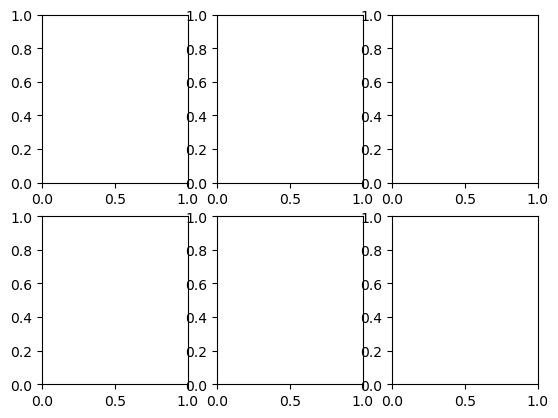

In [5]:
x, y = 0, 0
fig, axs = plt.subplots(2, 3)
percent = np.arange(0.5, 99.5, 0.5)
K=3
N=[5,10,50]
size=100000

b

In [6]:
for n in N:
    A = chi2.rvs(K, size=(100000, n))
print(A)

[[ 1.95535863  0.88222155 10.87798709 ...  5.37551435  1.20800185
   0.63447222]
 [ 1.57234864  2.5985437   1.05257587 ...  1.87763398  8.89591578
   1.55008503]
 [ 0.68957207  2.5354564   0.11725043 ...  3.71436219  3.58215446
   0.14257414]
 ...
 [ 4.05907214  5.97796144  2.74494167 ...  3.8509674   0.28426379
   1.97739048]
 [ 0.37115195  0.43623461  3.54895696 ...  1.60041792  3.05779557
   0.32265052]
 [ 3.85505874  2.47344133  1.31616046 ...  2.31022126  2.3253915
   2.15387032]]


c,d,e

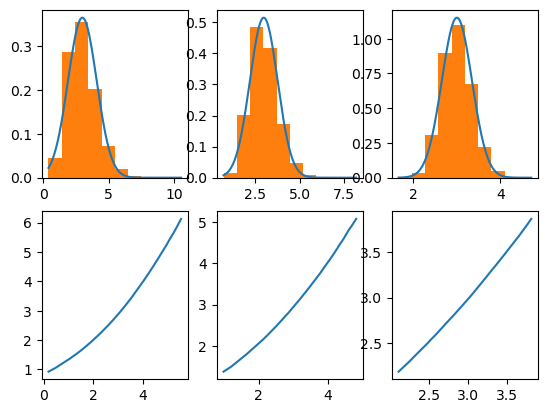

In [7]:
#c
fig,axs=plt.subplots(2, 3)
for n in N:
    A = chi2.rvs(K, size = (100000, n))
    sample_avg = np.mean(A, axis=1)
    sample_avg.sort()
#d
    nrm = norm.pdf(sample_avg, K, scale = math.sqrt((2 * K)/n))
    axs[0,x].plot(sample_avg, nrm)
    axs[0,x].hist(sample_avg, density = True)
    x += 1
#e
    p1 = np.percentile(norm.rvs(loc = K, scale = (math.sqrt((2 * K)/n)), size = 100000 ),percent)
    p2 = np.percentile(sample_avg, percent)
    axs[1,y].plot(p1, p2)
    y += 1
    
plt.show()

In Q2, for N=5 and N=50, the approximate sample means given by the CTL is nearly same as in Q1

Q3

Assumption is that the probability P = 0.1 does not change (Ho)

In [8]:
import math
mt = math.factorial(120) / (math.factorial(20) * math.factorial(120 - 20))
#display(mt)
pval = mt * (0.1**20) * ((1-0.1)**100)
print('The probability under Ho of having observed 20 cases - ',pval)
if pval < (1-(0.95/2)) : # alpha value is 95%
   print("\nTherfore rejecting null hypothesis")
else:
  print("\nTherfore accepting null hypothesis")

The probability under Ho of having observed 20 cases -  0.007825579711977114

Therfore rejecting null hypothesis


In [9]:
a = 1 - (0.95)
print('The probability under Ho of having observed an outcome at least as extreme as 20 cases - ',pval)
if pval < a :    # alpha value is 95%
   print("\nTherfore rejecting null hypothesis")
else:
  print("\nTherfore accepting null hypothesis")

The probability under Ho of having observed an outcome at least as extreme as 20 cases -  0.007825579711977114

Therfore rejecting null hypothesis


Thus the result shows that epidemic still exists.

Here, if we keep on increasing the class value from 4 to 300, the N will get 9000. So, if we compute p-value with this new amount, it is always going to be less for the binomial distribution and so it will always reject the hypothesis. As the sample size increases, the computation increases and hard to accept the hypothesis in binomial distribution and cant be use for large number of samples.

In [10]:
n = 9000
sqrt_n = math.sqrt(n)
t_mean = 9000 * 0.1
s_mean = 945
variance = 30 * 0.1 * 0.9   #σ2=npq
print('The theoretical mean under Ho -',t_mean)
print('The observed sample mean -',s_mean)
print('The sample size -',n)
print('The Variance of Binom (30, p) -',variance)

The theoretical mean under Ho - 900.0
The observed sample mean - 945
The sample size - 9000
The Variance of Binom (30, p) - 2.7


In [11]:
stdvn = math.sqrt(variance)
print('Standard Deviation of Binom (30, p) - ',stdvn)

Standard Deviation of Binom (30, p) -  1.6431676725154984


pval = N(0,1)((-inf, sqrt_n* (t_mean-s_mean)/stdvn])

In [12]:
a = math.sqrt(9000) * ((900-945)/math.sqrt( 9000 * 0.1 * 0.9 ))

import scipy.stats as st

p_val1 =st.norm.sf(a)
print('p_val- ',p_val1)
b = (1-(0.95/2))
if p_val1 < b :  # alpha value is 95%
    print("\nTherfore rejecting null hypothesis")
else:
    print("\nTherfore accepting null hypothesis")

p_val-  1.0

Therfore accepting null hypothesis


Thus the result shows that epidemic still exists.